<div> 
<img src="https://res-5.cloudinary.com/crunchbase-production/image/upload/c_lpad,h_256,w_256,f_auto,q_auto:eco/v1455514364/pim02bzqvgz0hibsra41.png" align="right"><br><br><FONT FACE="sans-serif" SIZE=4>
<b>Ciencias de la computación e Inteligencia Artificial </b>
<br>
<b>Autor: </b>
Emmanuel Mora Mosquera
<br>
<b>Correo: </b>
emmanuel.mora3415@gmail.com
 <br>
<i><b>Docente:</b></i> John Corredor
<br>
<b>Asignatura:</b> HPC
<br>
<b>Tema:</b> Parcial 03 - Song Data
<br>
<b>Fecha: </b>
23/11/22
<br>
</FONT>
</div>

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [4]:
df = pd.read_csv("https://raw.githubusercontent.com/Hobbit3415/HPC/main/parcial03/Dataset/song_data.csv", delimiter=",")

In [5]:
# Se elimina la columna "song_name" puesto que no es relevante para el ejercicio
df = df.drop("song_name", axis=1)

# Song data
## Columnas
0. **song_popularity**: Variable que indica que tan popular es la canción (variable objetivo)
1. **song_duration_ms**: Variable que indica la duración en ms de la canción

2. **acousticness**: Una medida de confianza de 0,0 a 1,0 sobre si la pista es acústica. 1,0 representa una alta confianza en que la pista es acústica.

3. **danceability**: Danceability describe la idoneidad de una pista para el baile basándose en una combinación de elementos musicales como el tempo, la estabilidad del ritmo, la fuerza del compás y la regularidad general. Un valor de 0,0 es el menos bailable y 1,0 el más bailable.

4. **energy**: La energía es una medida de 0,0 a 1,0 y representa una medida perceptiva de intensidad y actividad. Por lo general, las pistas energéticas se sienten rápidas, ruidosas y con mucho ruido. Por ejemplo, el death metal tiene mucha energía, mientras que un preludio de Bach tiene una puntuación baja en la escala. Las características perceptivas que contribuyen a este atributo son el rango dinámico, el volumen percibido, el timbre, la velocidad de aparición y la entropía general.

5. **instrumentalness**: Predice si una pista no contiene voces. Los sonidos "Ooh" y "aah" se consideran instrumentales en este contexto. Las pistas de rap o de palabras habladas son claramente "vocales". Cuanto más se acerque el valor de instrumentalización a 1,0, mayor será la probabilidad de que la pista no tenga contenido vocal. Los valores superiores a 0,5 representan pistas instrumentales, pero la confianza es mayor a medida que el valor se acerca a 1,0.

6. **key**: La tonalidad musical en la se encuentra la pista. Los números enteros se asignan a los tonos utilizando la notación estándar de la clase de tono. Por ejemplo, 0 = C, 1 = C♯/D♭, 2 = D, y así sucesivamente. Si no se detecta ninguna clave, el valor es -1.

7. **liveness**: Detecta la presencia de público en la grabación. Los valores más altos de liveness representan una mayor probabilidad de que la pista haya sido interpretada en directo. Un valor superior a 0,8 proporciona una fuerte probabilidad de que la pista sea en directo.

8. **loudness**: La sonoridad general de una pista en decibelios (dB). Los valores de sonoridad se promedian en toda la pista y son útiles para comparar la sonoridad relativa de las pistas. La sonoridad es la cualidad de un sonido que es el principal correlato psicológico de la fuerza física (amplitud). Los valores suelen oscilar entre -60 y 0 db.

9. **audio_mode**: Indica la modalidad (mayor o menor) de una pista, el tipo de escala del que se deriva su contenido melódico. El mayor se representa con 1 y el menor con 0.

10. **speechiness**: La expresividad detecta la presencia de palabras habladas en una pista. Cuanto más exclusivamente hablada sea la grabación (por ejemplo, un programa de entrevistas, un audiolibro o una poesía), más se acercará a 1,0 el valor del atributo. Los valores superiores a 0,66 describen pistas que probablemente estén compuestas exclusivamente por palabras habladas. Los valores entre 0,33 y 0,66 describen pistas que pueden contener tanto música como voz, ya sea en secciones o en capas, incluyendo casos como la música rap. Los valores inferiores a 0,33 representan probablemente música y otras pistas no habladas.

11. **tempo**: El tempo global estimado de una pista en pulsaciones por minuto (BPM). En la terminología musical, el tempo es la velocidad o el ritmo de una pieza determinada y se deriva directamente de la duración media de los tiempos.

12. **time_signature**: Un compás estimado. El compás es una convención de notación para especificar cuántos tiempos hay en cada compás. El compás va de 3 a 7, indicando compases de "3/4" a "7/4".

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18835 entries, 0 to 18834
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   song_popularity   18835 non-null  int64  
 1   song_duration_ms  18835 non-null  int64  
 2   acousticness      18835 non-null  float64
 3   danceability      18835 non-null  float64
 4   energy            18835 non-null  float64
 5   instrumentalness  18835 non-null  float64
 6   key               18835 non-null  int64  
 7   liveness          18835 non-null  float64
 8   loudness          18835 non-null  float64
 9   audio_mode        18835 non-null  int64  
 10  speechiness       18835 non-null  float64
 11  tempo             18835 non-null  float64
 12  time_signature    18835 non-null  int64  
 13  audio_valence     18835 non-null  float64
dtypes: float64(9), int64(5)
memory usage: 2.0 MB


# Conteo, promedios y desviaciones estandar de cada columna

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
song_popularity,18835.0,52.991877,21.905654,0.000000,40.0000,56.000000,69.00000,100.000
song_duration_ms,18835.0,218211.587576,59887.540566,12000.000000,184339.5000,211306.000000,242844.00000,1799346.000
acousticness,18835.0,0.258539,0.288719,0.000001,0.0241,0.132000,0.42400,0.996
danceability,18835.0,0.633348,0.156723,0.000000,0.5330,0.645000,0.74800,0.987
energy,18835.0,0.644995,0.214101,0.001070,0.5100,0.674000,0.81500,0.999
instrumentalness,18835.0,0.078008,0.221591,0.000000,0.0000,0.000011,0.00257,0.997
key,18835.0,5.289196,3.614595,0.000000,2.0000,5.000000,8.00000,11.000
liveness,18835.0,0.179650,0.143984,0.010900,0.0929,0.122000,0.22100,0.986
loudness,18835.0,-7.447435,3.827831,-38.768000,-9.0440,-6.555000,-4.90800,1.585
audio_mode,18835.0,0.628139,0.483314,0.000000,0.0000,1.000000,1.00000,1.000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18835 entries, 0 to 18834
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   song_popularity   18835 non-null  int64  
 1   song_duration_ms  18835 non-null  int64  
 2   acousticness      18835 non-null  float64
 3   danceability      18835 non-null  float64
 4   energy            18835 non-null  float64
 5   instrumentalness  18835 non-null  float64
 6   key               18835 non-null  int64  
 7   liveness          18835 non-null  float64
 8   loudness          18835 non-null  float64
 9   audio_mode        18835 non-null  int64  
 10  speechiness       18835 non-null  float64
 11  tempo             18835 non-null  float64
 12  time_signature    18835 non-null  int64  
 13  audio_valence     18835 non-null  float64
dtypes: float64(9), int64(5)
memory usage: 2.0 MB


In [9]:
df.head()

,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
0,73,262333,0.005520,0.496,0.682,0.000029,8,0.0589,-4.095,1,0.0294,167.060,4,0.474
1,66,216933,0.010300,0.542,0.853,0.000000,3,0.1080,-6.407,0,0.0498,105.256,4,0.370
2,76,231733,0.008170,0.737,0.463,0.447000,0,0.2550,-7.828,1,0.0792,123.881,4,0.324
3,74,216933,0.026400,0.451,0.970,0.003550,0,0.1020,-4.938,1,0.1070,122.444,4,0.198
4,56,223826,0.000954,0.447,0.766,0.000000,10,0.1130,-5.065,1,0.0313,172.011,4,0.574


# Comportamiento de los datos

In [10]:
import seaborn as sns
import random

In [11]:
def randomColor(palette):
  return random.choice(sns.color_palette(palette))

## Histogramas

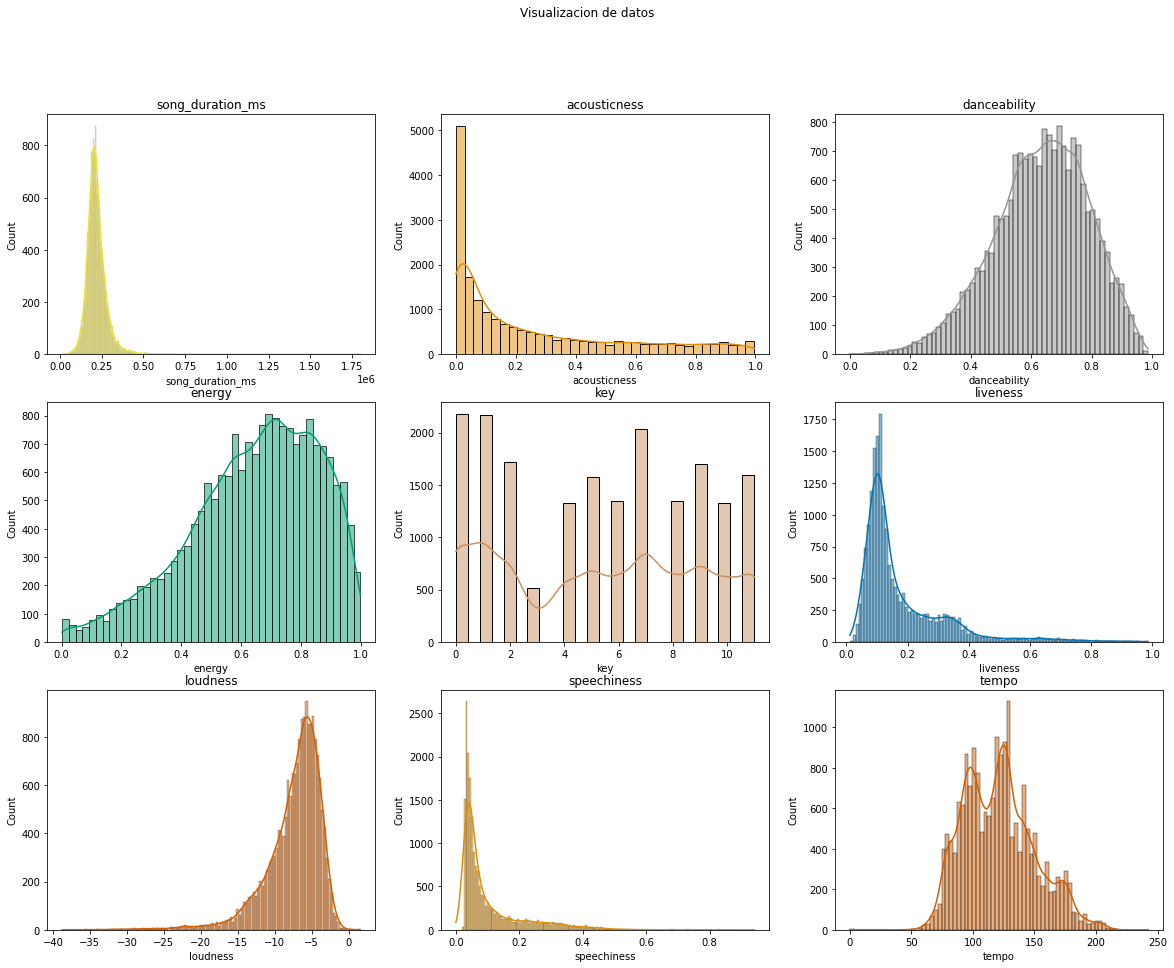

In [12]:
figure, ax = plt.subplots(3, 3, figsize=(20, 15))
plt.suptitle("Visualizacion de datos")

sns.histplot(df['song_duration_ms'], color=randomColor("colorblind"), kde=True,ax=ax[0, 0])
sns.histplot(df['acousticness'], color=randomColor("colorblind"), kde=True,ax=ax[0, 1])
sns.histplot(df['danceability'], color=randomColor("colorblind"), kde=True,ax=ax[0, 2])

sns.histplot(df['energy'], color=randomColor("colorblind"), kde=True,ax=ax[1, 0])
sns.histplot(df['key'], color=randomColor("colorblind"), kde=True,ax=ax[1, 1])
sns.histplot(df['liveness'], color=randomColor("colorblind"), kde=True,ax=ax[1, 2])

sns.histplot(df['loudness'], color=randomColor("colorblind"), kde=True,ax=ax[2, 0])
sns.histplot(df['speechiness'], color=randomColor("colorblind"), kde=True,ax=ax[2, 1])
sns.histplot(df['tempo'], color=randomColor("colorblind"), kde=True,ax=ax[2, 2])

ax[0, 0].set_title('song_duration_ms')
ax[0, 1].set_title('acousticness')
ax[0, 2].set_title('danceability')

ax[1, 0].set_title('energy')
ax[1, 1].set_title('key')
ax[1, 2].set_title('liveness')

ax[2, 0].set_title('loudness')
ax[2, 1].set_title('speechiness')
ax[2, 2].set_title('tempo')

plt.show()

Las columnas:
* song_duration
* danceability
* loudness

A pesar de no contar con una una distribución normal contundente, el posible sesgo es despreciable, por ende, no es necesario estandarizarlas

Las columnas:
* acousticness
* energy
* key
* liveness
* speechness
* tempo

No poseen una distribución normal. Es necesario estandarizar estas columnas

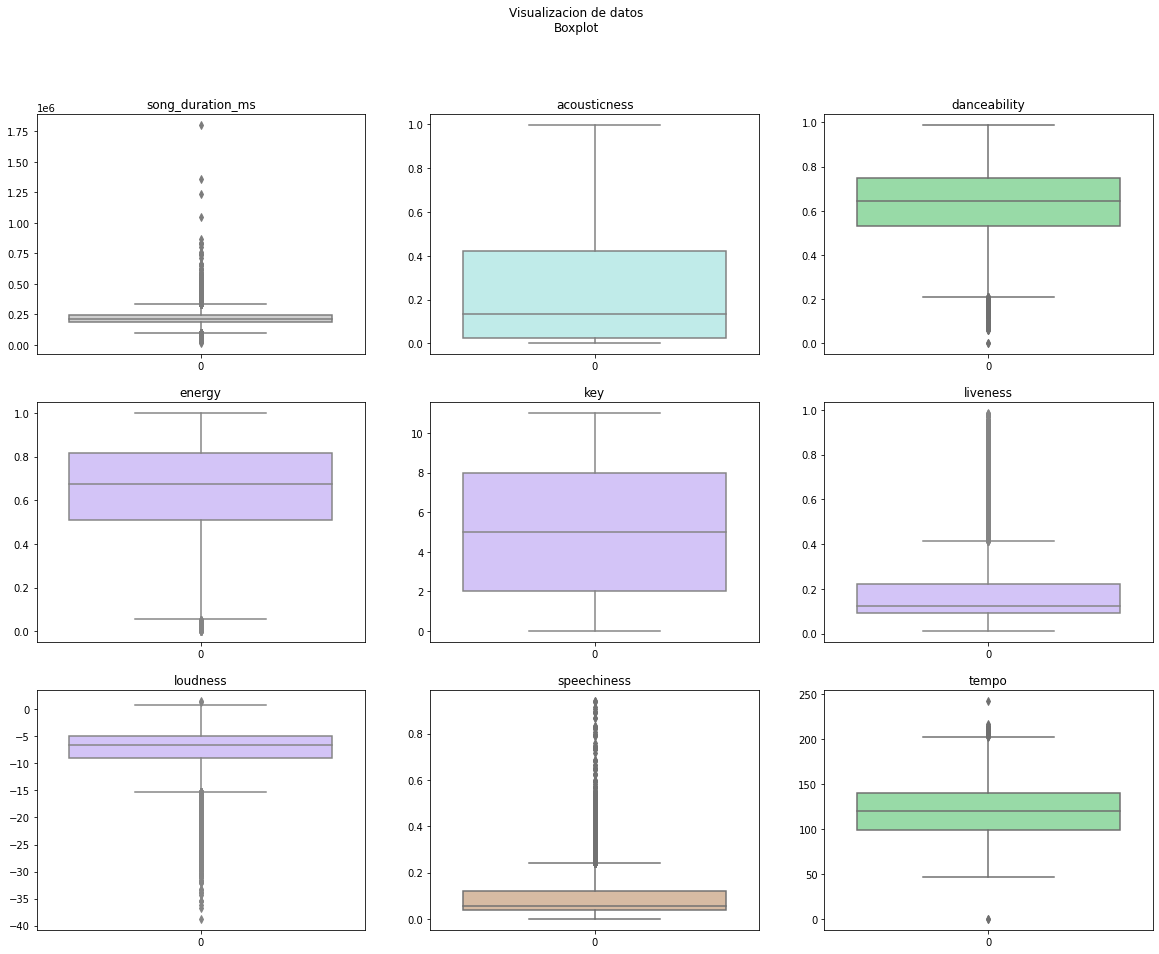

In [13]:
figure, ax = plt.subplots(3, 3, figsize=(20, 15))
plt.suptitle("Visualizacion de datos\nBoxplot")

sns.boxplot(data=df['song_duration_ms'], color=randomColor("pastel"), orient="v", ax=ax[0, 0])
sns.boxplot(data=df['acousticness'], color=randomColor("pastel"), orient="v", ax=ax[0, 1])
sns.boxplot(data=df['danceability'], color=randomColor("pastel"), orient="v", ax=ax[0, 2])

sns.boxplot(data=df['energy'], color=randomColor("pastel"), orient="v", ax=ax[1, 0])
sns.boxplot(data=df['key'], color=randomColor("pastel"), orient="v", ax=ax[1, 1])
sns.boxplot(data=df['liveness'], color=randomColor("pastel"), orient="v", ax=ax[1, 2])

sns.boxplot(data=df['loudness'], color=randomColor("pastel"), orient="v", ax=ax[2, 0])
sns.boxplot(data=df['speechiness'], color=randomColor("pastel"), orient="v", ax=ax[2, 1])
sns.boxplot(data=df['tempo'], color=randomColor("pastel"), orient="v", ax=ax[2, 2])

ax[0, 0].set_title('song_duration_ms')
ax[0, 1].set_title('acousticness')
ax[0, 2].set_title('danceability')

ax[1, 0].set_title('energy')
ax[1, 1].set_title('key')
ax[1, 2].set_title('liveness')

ax[2, 0].set_title('loudness')
ax[2, 1].set_title('speechiness')
ax[2, 2].set_title('tempo')

plt.show()

Las columnas: 
* song_duration_ms
* danceability
* energy
* liveness
* loudness
* speechness
* tempo

Poseen un numero considerable de datos outliers, por ende será necesario escalar los datos de estas columnas

Luego de analizar las distribuciones de las columnas y sus gráficas de caja, se decide que es necesario estandarizar las siguientes columnas:
* song_duration
* danceability
* energy
* liveness
* loudness
* speechness
* tempo
* acousticness
* key

In [14]:
to_standarize = ["song_duration", "danceability", "energy", "liveness", 
                 "loudness", "speechness", "tempo", "acousticness", "key"]

## Matriz de correlaciones

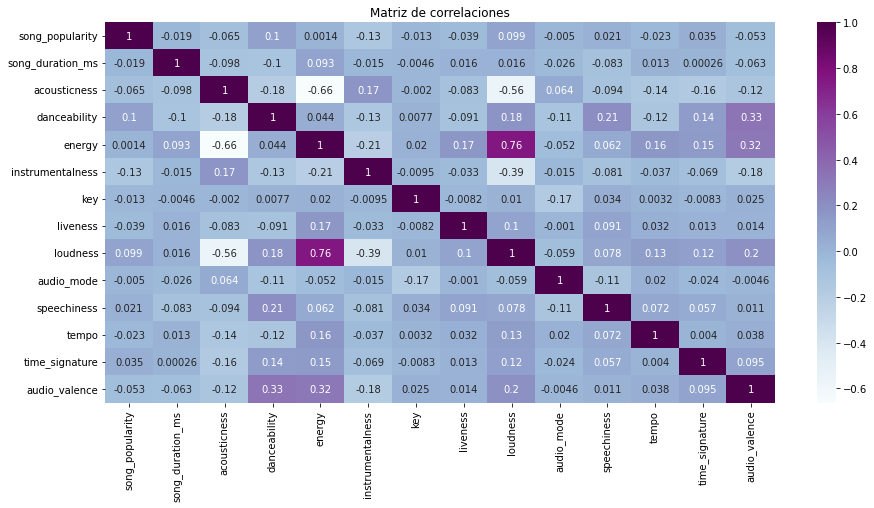

In [15]:
plt.figure(figsize=[15, 7])
plt.title('Matriz de correlaciones')
sns.heatmap(data=df.corr(), annot=True, cmap='BuPu')
plt.show()

* A simple vista no es posible encontrar una columna que tenga una correlación directa con la variable objetivo "song_popularity"

* Las columnas "loudness" y "energy" son las dos columnas del dataset cuya correlación es más alta. Tiene sentido puesto que al escuchar canciones que transmiten una sensación de energía, estas suelen poseer decibelios más altos.

* Las columnas "acousticness" e "instrumentalness" poseen una correlación positiva puesto que las canciones acusticas suelen tener un mayor número de sonidos instrumentales

* Las columnas "liveness" y "energy" poseen una correlación positva. Es posible interpretar que aquellas canciones que se tocan en vivo dan una mayor sensación de energía

* Las columnas "loudness" y "acousticness" poseen una correlacíon negativa. Es posible interpretar que aquellas canciones de naturaleza acustica, suelen tener sonidos con un número menor de decibelios

# Division del conjunto de datos

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
# Se elimina la columna "quality" puesto que es la variable objetivo del dataset (target)
X = df.drop("song_popularity", axis=1)
y = df.song_popularity

In [18]:
# Division del conjunto de datos
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

# Modelo con Scikit learn

In [19]:
# Importacion de escalador de datos
# RobustScaler es un escalador que se emplea en conjuntos
# de datos que poseen una gran cantidad de outliers
from sklearn.preprocessing import RobustScaler
# Biblioteca que automatiza el entrenamiento de un modelo
from sklearn.pipeline import Pipeline
# Importacion de biblioteca que posee los metodos de regresion lineal
from sklearn.linear_model import LinearRegression

In [20]:
# Se crea el pipeline y se ingresan como parametros un array con los pasos
# que debe de emplear para la elaboracion del modelo
pipe = Pipeline([
    # Escalador
    ('scaler', RobustScaler()),
    # Clasificador
    ('clf', LinearRegression())
    ])

In [21]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('scaler', RobustScaler()), ('clf', LinearRegression())])

# Comparacion de modelos C++ y Python Scikit Learn

## R2 en Python

In [22]:
from sklearn.metrics import r2_score

In [23]:
# Se realiza la prediccion del conjunto de entrenamiento
predicciones_train = pipe.predict(X_train)
# Se realiza la prediccion del conjunto de pruebas
predicciones_test = pipe.predict(X_test)

In [24]:
# Score R2 del conjunto de entrenamiento
scoreR2_train = r2_score(y_train, predicciones_train)
# Score R2 del conjunto de pruebas
scoreR2_test = r2_score(y_test, predicciones_test)

print(f"Puntaje de R2 entrenamiento con Scikit Learn: \t{round(scoreR2_train, 4)}")
print(f"Puntaje de R2 pruebas con Scikit Learn: \t{round(scoreR2_test, 4)}")

Puntaje de R2 entrenamiento con Scikit Learn: 	0.0465
Puntaje de R2 pruebas con Scikit Learn: 	0.0443


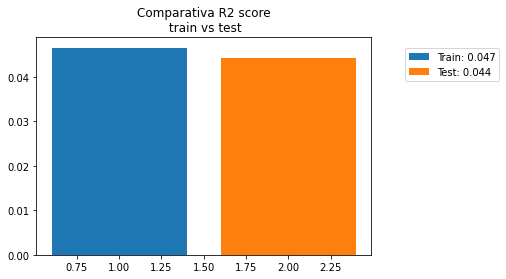

In [25]:
fig, ax = plt.subplots()
plt.title('Comparativa R2 score\n train vs test')
ax.bar(1, scoreR2_train, label=f"Train: {round(scoreR2_train, 3)}")
ax.bar(2, scoreR2_test, label=f"Test: {round(scoreR2_test, 3)}")
ax.legend(loc = (1.1, 0.8))
plt.show()

## R2 en C++
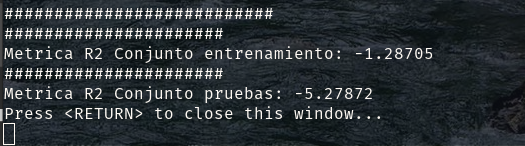

El modelo en C++ dio resultados inesperados puesto que la ejecución del programa parece correcta. Detecta eficientemente el número de filas y columnas del Dataset cómo se muestra en la imagen a continuación:

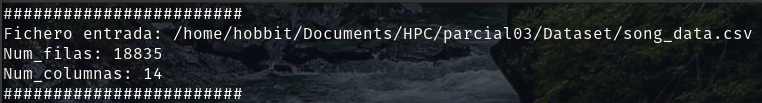

Tras un análisis más exhaustivo, se encuentra que el problema se encuentra en la forma en la que se están calculando los promedios y las desviaciónes estándar de cada una de las columnas. En la siguiente imagen es posible observar los promedios y las desviaciones estándar de cada columna entregados por el programa en C++

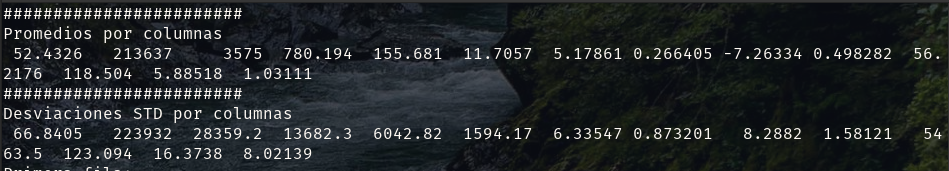

Este problema se debe a una implementación incorrecta de los siguientes métodos

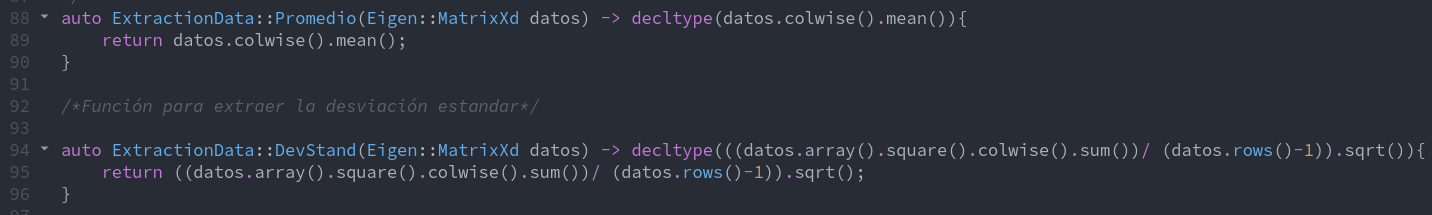

Durante el desarrollo del examen, se realizaron varias modificaciones a dichos métodos sin resultados fructíferos, por ende, $colwise$ de Eigen es el que está mal implementado

## Comparativa

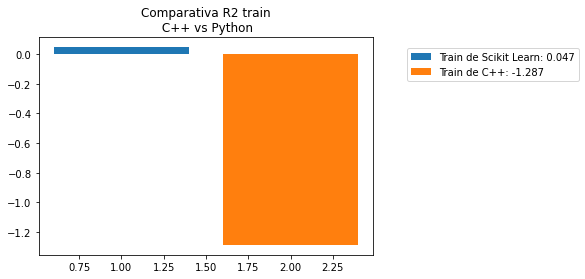

In [81]:
fig, ax = plt.subplots()
plt.title('Comparativa R2 train\n C++ vs Python')
ax.bar(1, scoreR2_train, label=f"Train de Scikit Learn: {round(scoreR2_train, 3)}")
ax.bar(2, -1.28705, label=f"Train de C++: {round(-1.28705, 3)}")
ax.legend(loc = (1.1, 0.8))
plt.show()

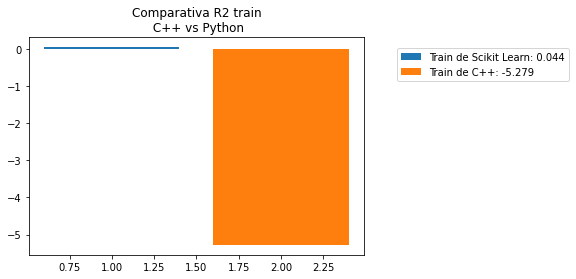

In [82]:
fig, ax = plt.subplots()
plt.title('Comparativa R2 train\n C++ vs Python')
ax.bar(1, scoreR2_test, label=f"Train de Scikit Learn: {round(scoreR2_test, 3)}")
ax.bar(2, -5.27872, label=f"Train de C++: {round(-5.27872, 3)}")
ax.legend(loc = (1.1, 0.8))
plt.show()

# Conclusiones

* Gracias a que el dataset no posee columnas categoricas, trabajar con el mismo fue una tarea llevadera. Mediante las métricas que contiene es posible predecir que tan popular puede ser una canción ya que la duración, el tempo, que tan bailable es y su nivel de instrumentalismo al ser valores numéricos, pueden ser modelados mediante un modelo de regresión.
* Las columnas del dataset poseen bastantes datos outliers, es por esto que la estandarización de las mismas es importante para mejorar el proceso de entrenamiento del modelo. En el módelo de C++ esto se hizo mediante un StandardScaler, mientras que en Python gracias a la biblioteca de Scikit Learn es posible utilizar el Robust Scaler el cuál, lleva a cabo esta tarea de una forma más eficiente ya que está diseñado específicamente para tratar con datos outliers
* El proceso de crear un modelo de regresión lineal en Python es sencillo gracias a la biblioteca SciKit Learn la cuál, cuenta con todos los métodos necesarios para realizar el preprocesamiento de la información, la construcción del modelo y de ser necesario, su automatización. A pesar de esto, es necesario destacar que todo esto conlleva un precio que, al comparar con un modelo hecho en C++, se paga en rendimiento. Cada uno tiene sus ventajas, pero en un entorno en el que sea necesario trabajar con grandes volúmenes de datos y se cuente con la infraestructura necesaria, trabajar estos modelos en python siempre será mejor puesto que no es necesario tener tanta rigurosidad en el manejo de los datos a comparación de C++
* La comparación final del modelo no fue satisfactoria debido a los problemas mencionados anteriormente. Sin embargo, ya se tenía un precedente de cómo debería de comportarse el modelo con un set de datos diferente. La sifguiente gráfica es unaa comparación entre el modelo de regresión trabajado anteriormente con el dataset Winedata

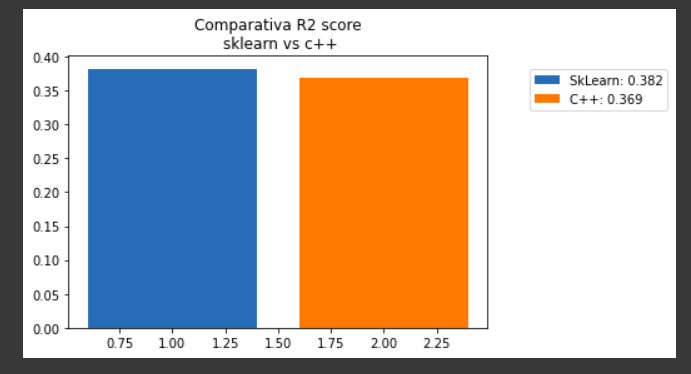

* Notese que los puntajes R2 de ambos modelos son muy similares, demostrando que en ambos lenguajes es posible obtener buenos resultados siendo la única diferencia el nivel de abstracción que maneja cada uno de ellos.